<center>
<h1>Wizualizacja danych w języku Python</h1>
    <h2>Pandas</h2>

</center>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#### Dane

In [15]:
dane = pd.read_csv('dane.csv', sep = ';', decimal = ',',
                   index_col=0)
dane.info()
dane.describe()
dane.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dzien    90 non-null     int64  
 1   prodA    90 non-null     float64
 2   prodB    90 non-null     float64
 3   Miesiac  90 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.5+ KB


,dzien,prodA,prodB,Miesiac
count,90.000000,90.000000,90.000000,90
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,marzec
freq,NaN,NaN,NaN,31
mean,15.533333,5.314444,0.981111,NaN
std,8.760483,2.598598,0.597729,NaN
min,1.000000,1.100000,0.100000,NaN
25%,8.000000,3.325000,0.500000,NaN
50%,15.500000,5.350000,0.950000,NaN
75%,23.000000,7.475000,1.400000,NaN


##### Dodanie nowej kolumny

In [40]:
dane['Sprzedaz całkowita'] = dane['prodA'] + dane['prodB']
dane[:2]
# wyswietla pierwsze 2 wiersze
dane[2:]
# wyswietla wszystkie oprocz 2 pierwszych wierszy
dane[-1:]
# wyswietla ostatni wiersz
dane[['Miesiac','prodA']]
dane[['Miesiac']]
# wyswietla w ramce damnych []
dane.head()
dane.tail()

,Miesiac,prodA
0,luty,8.2
1,luty,9.9
2,luty,6.1
3,luty,6.4
4,luty,8.2
...,...,...
85,styczen,4.6
86,styczen,2.1
87,styczen,8.6
88,styczen,7.0


#### Zmienne jakościowe

In [51]:
dane['mies_cat'] = pd.Categorical(dane.Miesiac, 
                      categories=["styczen","luty","marzec"],
                      ordered=True)

In [ ]:
dane[dane.mies_cat < "marzec"]

In [50]:
dane.describe(include="all")

,dzien,prodA,prodB,Miesiac,Sprzedaz całkowita,mies_cat
count,90.000000,90.000000,90.000000,90,90.000000,90
unique,NaN,NaN,NaN,3,NaN,3
top,NaN,NaN,NaN,marzec,NaN,styczen
freq,NaN,NaN,NaN,31,NaN,31
mean,15.533333,5.314444,0.981111,NaN,6.295556,NaN
std,8.760483,2.598598,0.597729,NaN,2.689677,NaN
min,1.000000,1.100000,0.100000,NaN,1.200000,NaN
25%,8.000000,3.325000,0.500000,NaN,4.100000,NaN
50%,15.500000,5.350000,0.950000,NaN,6.000000,NaN
75%,23.000000,7.475000,1.400000,NaN,8.500000,NaN


In [61]:
dane.iloc[27:60,-2:]
# od 27 do 60 wiersza, 2 ostatnie kolumny
dane.iloc[27:60, [3,5]]
# od 27 do 60 wiersza, kolumna 3 i 5
dane.loc[27:60,['Miesiac','mies_cat']]
# od 27 do 60 wiersza, kolumna miesiac i mies_cat

,Miesiac,mies_cat
27,luty,luty
28,marzec,marzec
29,marzec,marzec
30,marzec,marzec
31,marzec,marzec
32,marzec,marzec
33,marzec,marzec
34,marzec,marzec
35,marzec,marzec
36,marzec,marzec


##### Dyskretyzacja

In [62]:
przedzialy=[1.2, 4.1, 8.5, 11.6]
etykiety=['Niska', 'Marna', 'Wysoka']
dane['sprzedaz_cat'] = pd.cut(dane['Sprzedaz całkowita'], przedzialy, labels=etykiety)
#pd.cut - stworzyła zmienną category

In [ ]:
dane.info()

In [64]:
dane[dane.sprzedaz_cat <= "Marna"]

,dzien,prodA,prodB,Miesiac,Sprzedaz całkowita,mies_cat,sprzedaz_cat
2,3,6.1,0.7,luty,6.8,luty,Marna
3,4,6.4,1.9,luty,8.3,luty,Marna
6,7,5.5,1.7,luty,7.2,luty,Marna
7,8,4.8,0.1,luty,4.9,luty,Marna
9,10,2.2,0.8,luty,3.0,luty,Niska
...,...,...,...,...,...,...,...
83,25,1.7,1.4,styczen,3.1,styczen,Niska
84,26,3.0,0.1,styczen,3.1,styczen,Niska
85,27,4.6,1.4,styczen,6.0,styczen,Marna
86,28,2.1,0.3,styczen,2.4,styczen,Niska


#### Tabela przestawna

##### Wiersze

,Sprzedaz całkowita
Miesiac,
luty,198.2
marzec,177.1
styczen,191.3


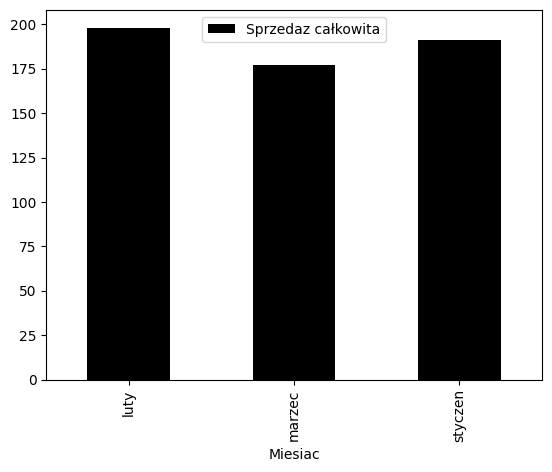

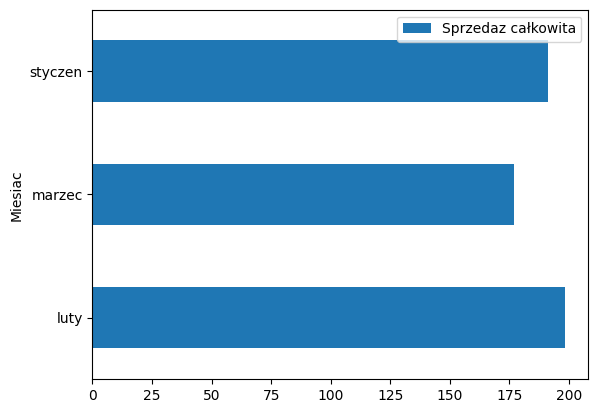

In [69]:
podsumowanie_W = dane.pivot_table(index='Miesiac',
                                       values = ['Sprzedaz całkowita'],
                                       aggfunc='sum')
display(podsumowanie_W)

podsumowanie_W.plot.bar(color="black"); #tworzy wykres kolumnowy
podsumowanie_W.plot.barh(); #tworzy horyzontalny wykres kolumnowy
# podsumowanie_W.plot.barh(stacked = True);

##### Kolumny

Miesiac,luty,marzec,styczen
Sprzedaz całkowita,198.2,177.1,191.3


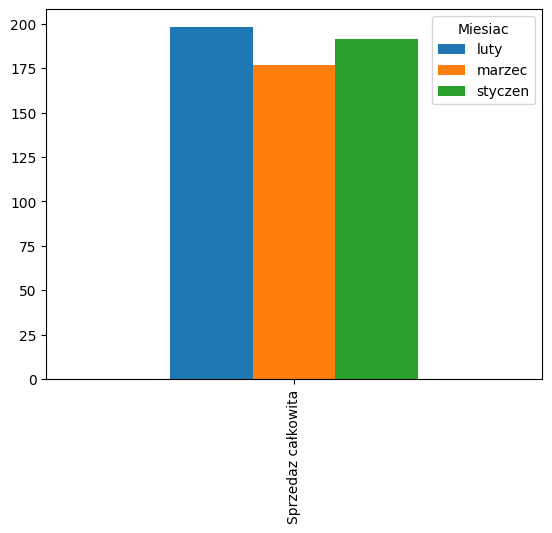

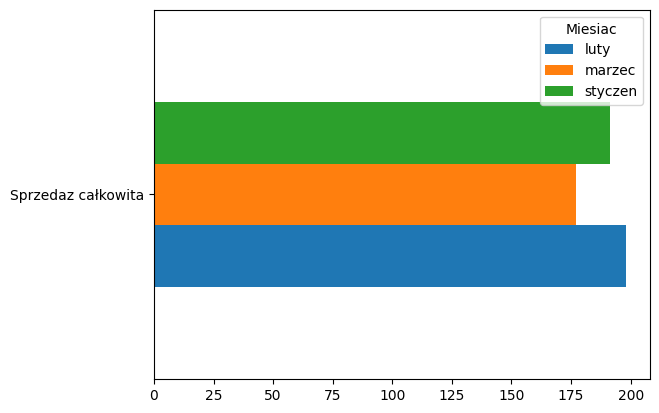

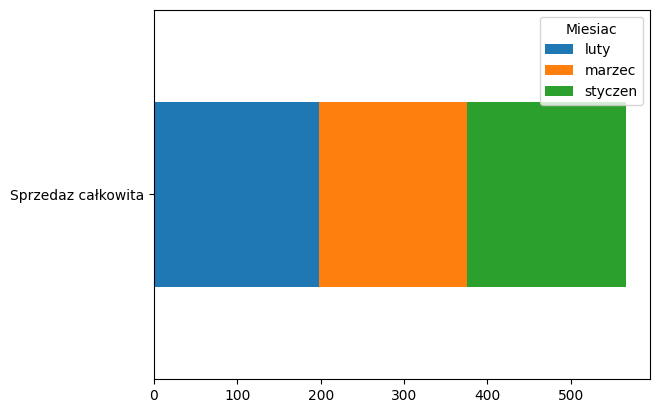

In [68]:
podsumowanie_K = dane.pivot_table(columns='Miesiac',
                                       values = ['Sprzedaz całkowita'],
                                       aggfunc='sum')
display(podsumowanie_K)

podsumowanie_K.plot.bar(); #tworzy wykres kolumnowy wzgledem wierszy?
podsumowanie_K.plot.barh();
podsumowanie_K.plot.barh(stacked = True);

##### Wiersze i kolumny

C:\Users\DELL\AppData\Local\Temp\ipykernel_5988\1651298493.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  podsumowanie_WK = dane.pivot_table(index = 'sprzedaz_cat', columns='mies_cat',


Sprzedaz całkowita             
mies_cat                styczen  luty marzec
sprzedaz_cat                                
Niska                      27.3  21.2   28.9
Marna                     101.9  79.8   89.8
Wysoka                     62.1  97.2   58.4

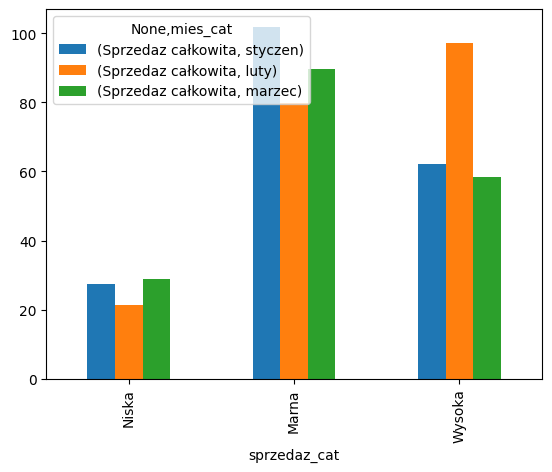

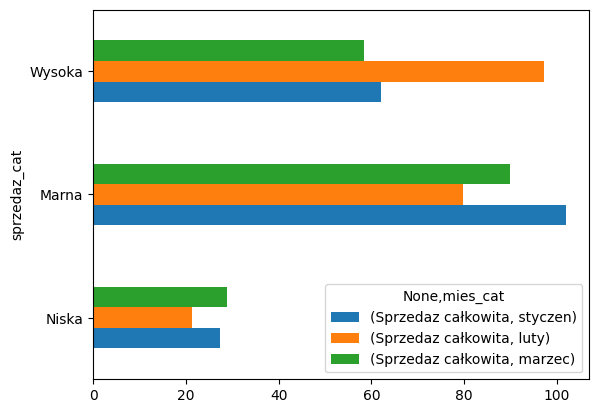

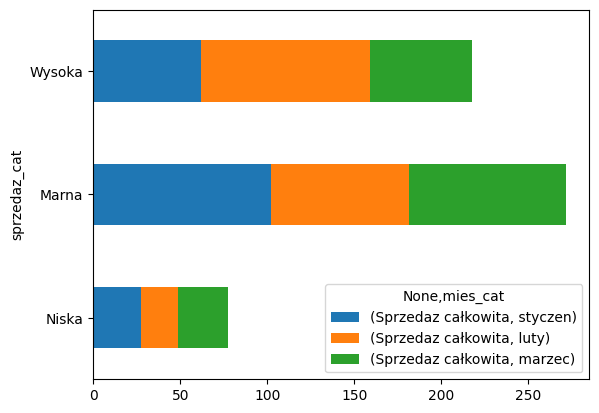

In [70]:
podsumowanie_WK = dane.pivot_table(index = 'sprzedaz_cat', columns='mies_cat',
                                       values = ['Sprzedaz całkowita'],
                                       aggfunc='sum')
display(podsumowanie_WK)

podsumowanie_WK.plot.bar();
podsumowanie_WK.plot.barh();
podsumowanie_WK.plot.barh(stacked = True);

#### Grupowanie

##### Wiersze

Miesiac
luty       198.2
marzec     177.1
styczen    191.3
Name: Sprzedaz całkowita, dtype: float64

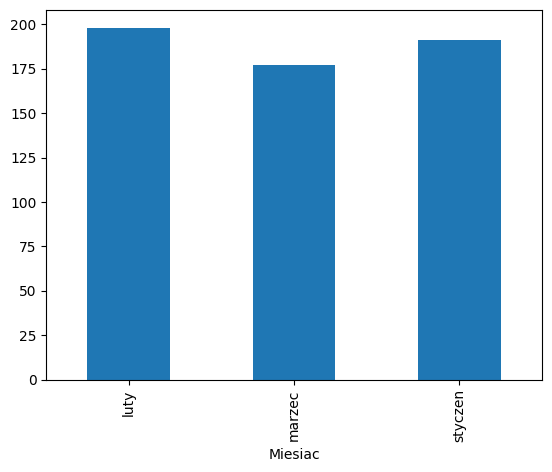

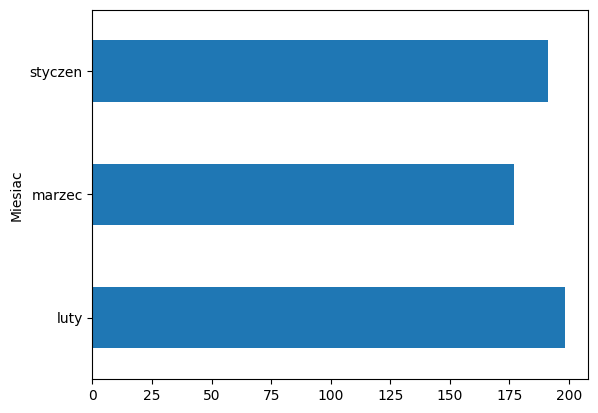

In [71]:
podsumowanie_W = dane.groupby(['Miesiac'])['Sprzedaz całkowita'].sum()
display(podsumowanie_W)

podsumowanie_W.plot.bar()
plt.show()

podsumowanie_W.plot.barh()
plt.show()

# podsumowanie_W.plot.barh(stacked = True)
# plt.show()

##### Kolumny

Miesiac,luty,marzec,styczen
Sprzedaz całkowita,198.2,177.1,191.3


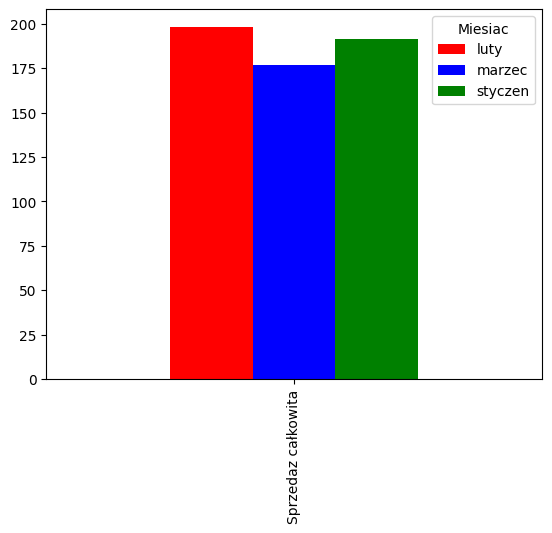

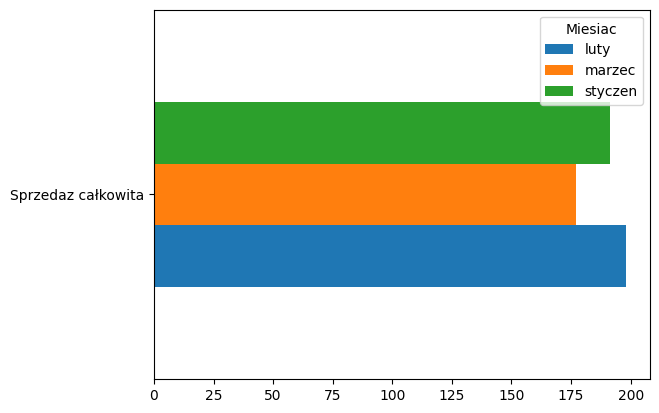

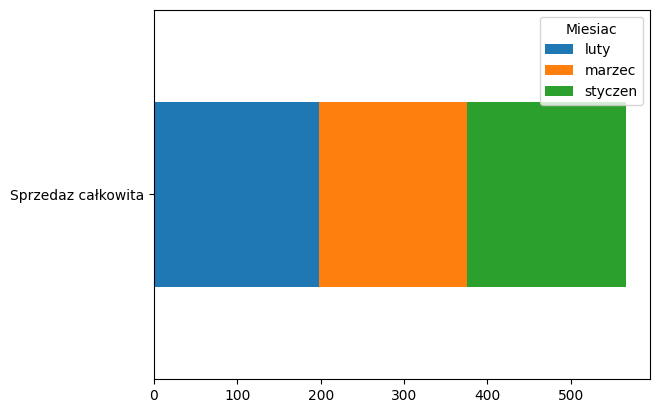

In [75]:
podsumowanie_W = dane.groupby(['Miesiac'])['Sprzedaz całkowita'].sum()
podsumowanie_K = pd.DataFrame(podsumowanie_W).T # T oznacza transpozycje
display(podsumowanie_K)

podsumowanie_K.plot.bar(color=["red","blue","green"])
plt.show()

podsumowanie_K.plot.barh()
plt.show()

podsumowanie_K.plot.barh(stacked = True)
plt.show()

##### Wiersze i Kolumny

C:\Users\DELL\AppData\Local\Temp\ipykernel_5988\206490350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  podsumowanie_WK = dane.groupby(['sprzedaz_cat', 'mies_cat'])['Sprzedaz całkowita'].sum()


sprzedaz_cat  mies_cat
Niska         styczen      27.3
              luty         21.2
              marzec       28.9
Marna         styczen     101.9
              luty         79.8
              marzec       89.8
Wysoka        styczen      62.1
              luty         97.2
              marzec       58.4
Name: Sprzedaz całkowita, dtype: float64

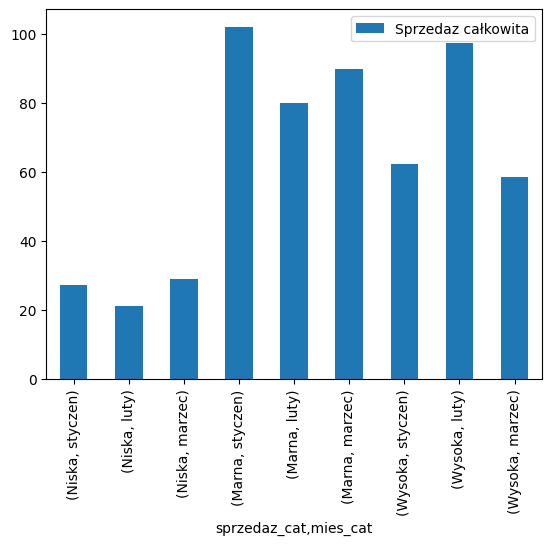

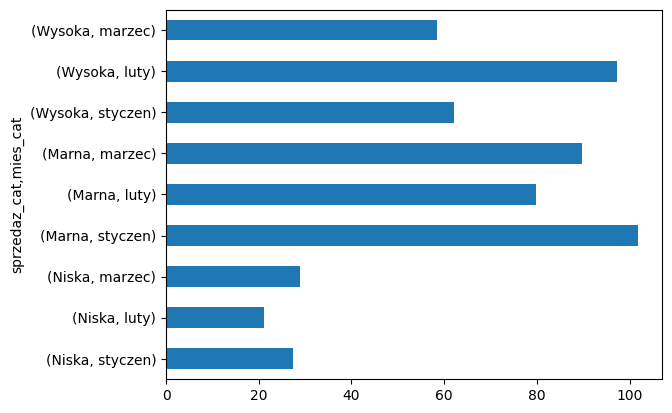

In [76]:
podsumowanie_WK = dane.groupby(['sprzedaz_cat', 'mies_cat'])['Sprzedaz całkowita'].sum()
display(podsumowanie_WK)

podsumowanie_WK.plot.bar()
plt.legend()
plt.show()

podsumowanie_WK.plot.barh()
plt.show()

# podsumowanie_WK.plot.barh(stacked = True)
# plt.show()

### Porównanie `pivot`  a  `groupby` 

In [77]:
grupy_P = dane.pivot_table(index='mies_cat', values = ['prodA'], aggfunc='count')
display(grupy_P)
grupy_G = dane.groupby(['mies_cat'])['prodA'].count()
display(grupy_G)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5988\2520948639.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  grupy_P = dane.pivot_table(index='mies_cat', values = ['prodA'], aggfunc='count')


,prodA
mies_cat,
styczen,31
luty,28
marzec,31


C:\Users\DELL\AppData\Local\Temp\ipykernel_5988\2520948639.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupy_G = dane.groupby(['mies_cat'])['prodA'].count()


mies_cat
styczen    31
luty       28
marzec     31
Name: prodA, dtype: int64

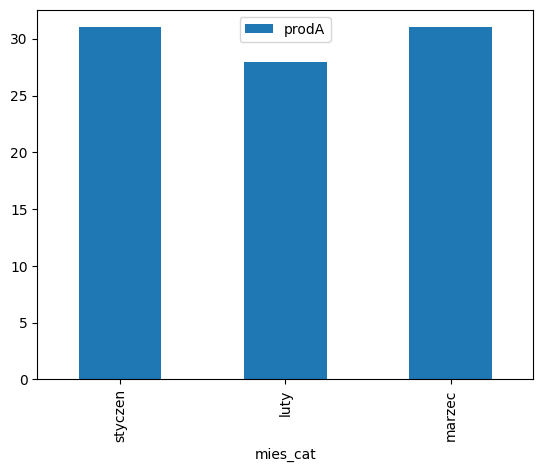

In [78]:
grupy_P.plot.bar();
grupy_G.plot.bar();

In [79]:
grupy_P = dane.pivot_table(index = 'mies_cat', values = ['prodA', 'prodB'], aggfunc='sum')
display(grupy_P)
grupy_G = dane.groupby('mies_cat')[['prodA', 'prodB']].sum()
display(grupy_G)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5988\4090857895.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  grupy_P = dane.pivot_table(index = 'mies_cat', values = ['prodA', 'prodB'], aggfunc='sum')


,prodA,prodB
mies_cat,,
styczen,164.4,26.9
luty,166.1,32.1
marzec,147.8,29.3


C:\Users\DELL\AppData\Local\Temp\ipykernel_5988\4090857895.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupy_G = dane.groupby('mies_cat')[['prodA', 'prodB']].sum()


,prodA,prodB
mies_cat,,
styczen,164.4,26.9
luty,166.1,32.1
marzec,147.8,29.3


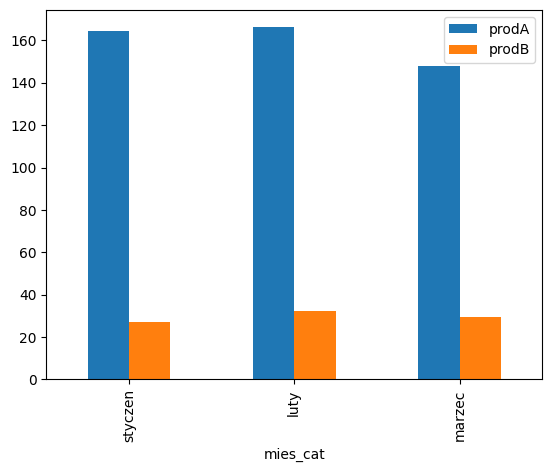

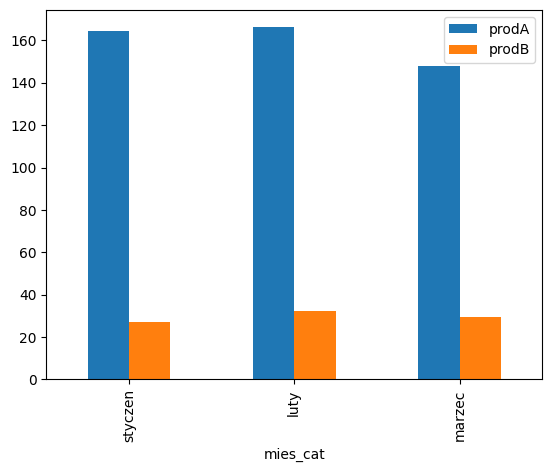

In [80]:
grupy_P.plot.bar();
grupy_G.plot.bar();

In [81]:
grupy_P_T = grupy_P.T
display(grupy_P_T)
grupy_G_T = grupy_G.T
display(grupy_G_T)

mies_cat,styczen,luty,marzec
prodA,164.4,166.1,147.8
prodB,26.9,32.1,29.3


mies_cat,styczen,luty,marzec
prodA,164.4,166.1,147.8
prodB,26.9,32.1,29.3


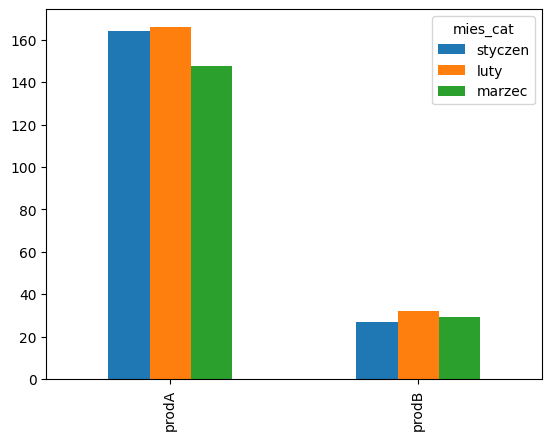

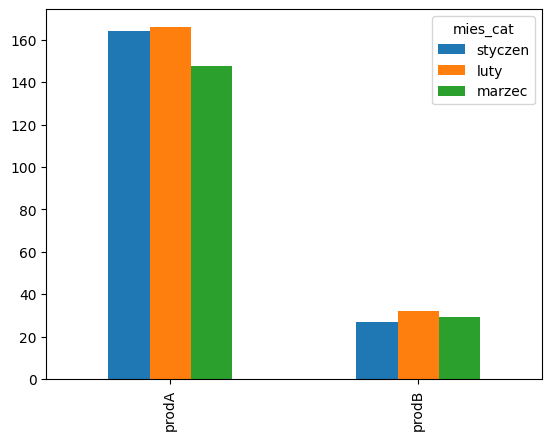

In [82]:
grupy_P_T.plot.bar();
grupy_G_T.plot.bar();